# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [88]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [89]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [90]:
tb1 = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
tb1

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [91]:
tb1 = pd.crosstab(df['sex'], 
                  df['flag_doente'], 
                  margins=True, 
                  margins_name = 'total').rename(index={0:'female', 1:'male'}, 
                                                 columns={0:'healthy', 1:'sick'})   
tb1

flag_doente,healthy,sick,total
sex,,,
female,72,25,97
male,92,114,206
total,164,139,303


In [92]:
tb1['mean sick'] = tb1.sick / tb1.total
tb1['odds'] = tb1.sick/tb1.healthy
tb1['odds ratio'] = tb1.odds/tb1.odds.total
tb1['Logito'] = np.log(tb1.odds)
tb1['weight of evidence'] = np.log(tb1.odds) / tb1.odds.total
tb1

flag_doente,healthy,sick,total,mean sick,odds,odds ratio,Logito,weight of evidence
sex,,,,,,,,
female,72,25,97,0.257732,0.347222,0.409672,-1.057790,-1.248040
male,92,114,206,0.553398,1.239130,1.461996,0.214410,0.252973
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,-0.195139


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [93]:
sel_5 = pd.qcut(df['age'], q=5)

tb2 = pd.crosstab(sel_5, 
                  df['flag_doente'], 
                  margins=True, 
                  margins_name = 'total').rename(columns={0:'healthy', 1:'sick'})
tb2['mean sick'] = tb2.sick / tb2.total
tb2['odds'] = tb2.sick/tb2.healthy
tb2['odds ratio'] = tb2.odds/tb2.odds.total
tb2['Logito'] = np.log(tb2.odds)
tb2['weight of evidence'] = np.log(tb2.odds) / tb2.odds.total

tb2['mean age'] = df.groupby(sel_5)['age'].mean()
tb2.loc['total', 'mean age'] = df['age'].mean()
tb2['mean age'] = tb2['mean age'].round(0)

tb2

C:\Users\Guilherme Rhein\AppData\Local\Temp\ipykernel_5468\2119063318.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tb2['mean age'] = df.groupby(sel_5)['age'].mean()


flag_doente,healthy,sick,total,mean sick,odds,odds ratio,Logito,weight of evidence,mean age
age,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-1.271364,41.0
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.762927,50.0
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.233406,56.0
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.062799,60.0
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.000000,67.0
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,-0.195139,54.0


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


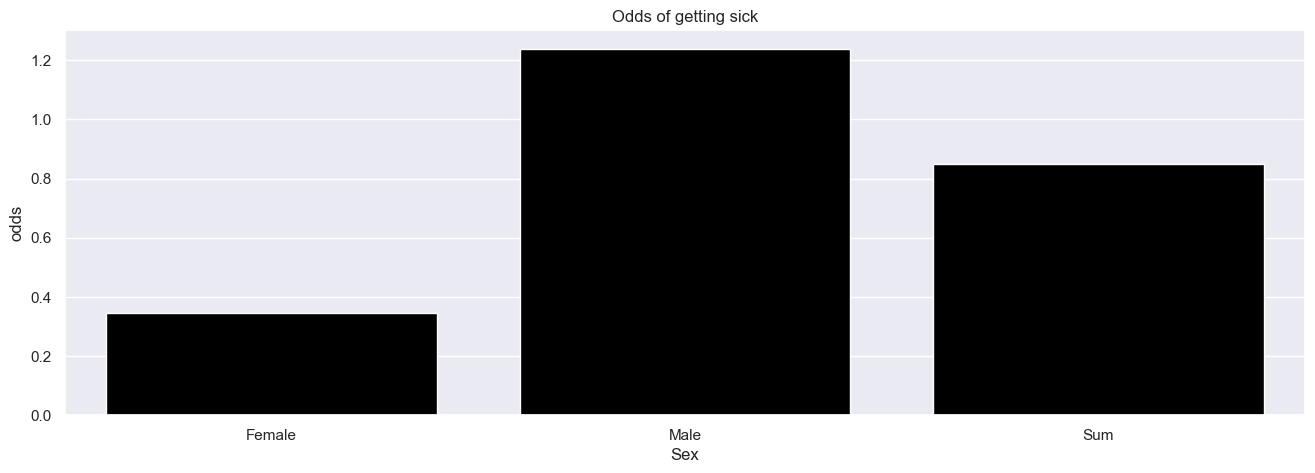

In [127]:
sns.set_theme()

# Configuração do tamanho da figura
plt.figure(figsize=(16, 5))

# Gráfico de barras para a chance
ax = sns.barplot(x=tb1.index, y='odds', data=tb1, color='black')
ax.set_title('Odds of getting sick')
ax.set_xlabel('Sex')
ax.set_xticklabels(labels=['Female', 'Male', 'Sum'], rotation=0)

# Exibir o gráfico
plt.show()

C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


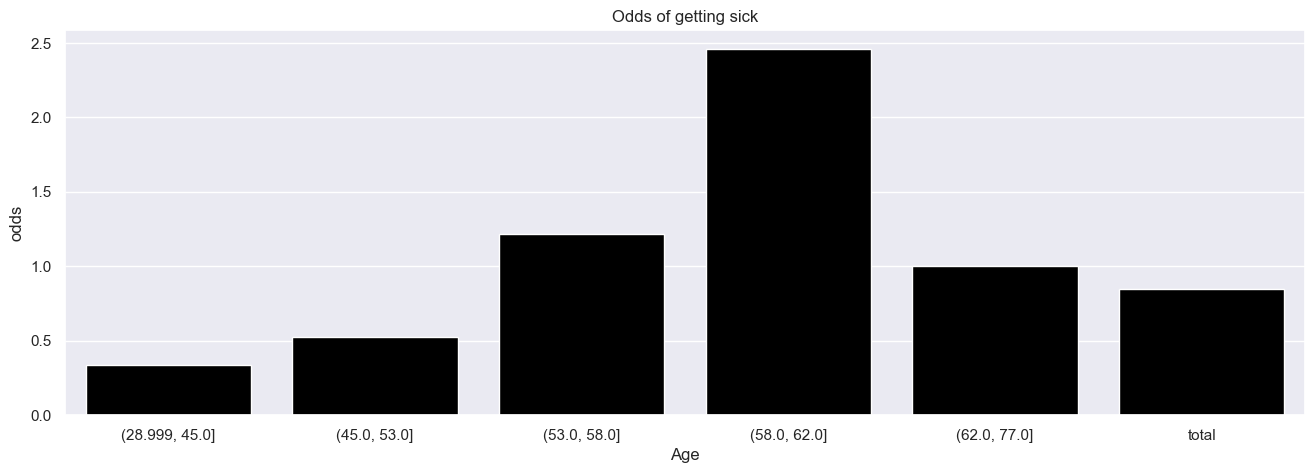

In [128]:
sns.set_theme()

# Configuração do tamanho da figura
plt.figure(figsize=(16, 5))

# Gráfico de barras para a chance
ax = sns.barplot(x=tb2.index, y='odds', data=tb2, color='black')
ax.set_title('Odds of getting sick')
ax.set_xlabel('Age')

# Exibir o gráfico
plt.show()